# Customer Segmentation - Model Building 

In [ ]:
!nvidia-smi

Wed Nov 23 13:46:15 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install pynvml
import pynvml

pynvml.nvmlInit()
handle = pynvml.nvmlDeviceGetHandleByIndex(0)
device_name = pynvml.nvmlDeviceGetName(handle)

if device_name != b'Tesla T4':
  raise Exception("""
    Unfortunately this instance does not have a T4 GPU.
    
    Please make sure you've configured Colab to request a GPU instance type.
    
    Sometimes Colab allocates a Tesla K80 instead of a T4. Resetting the instance.

    If you get a K80 GPU, try Runtime -> Reset all runtimes...
  """)
else:
  print('Woo! You got the right kind of GPU!')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 46 kB 3.1 MB/s 
Woo! You got the right kind of GPU!


In [ ]:
!git clone https://github.com/rapidsai-community/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/env-check.py

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 300, done.
remote: Counting objects: 100% (129/129), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 300 (delta 74), reused 99 (delta 55), pack-reused 171
Receiving objects: 100% (300/300), 87.58 KiB | 4.61 MiB/s, done.
Resolving deltas: 100% (136/136), done.
***********************************************************************
Woo! Your instance has the right kind of GPU, a Tesla T4!
***********************************************************************



In [ ]:
!bash rapidsai-csp-utils/colab/update_gcc.sh
import os
os._exit(00)

Updating your Colab environment.  This will restart your kernel.  Don't Panic!
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages [1,038 kB]
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 P

In [ ]:
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:30
🔁 Restarting kernel...


In [ ]:
import condacolab
condacolab.check()

✨🍰✨ Everything looks OK!


In [ ]:
!python rapidsai-csp-utils/colab/install_rapids.py stable
import os
os.environ['NUMBAPRO_NVVM'] = '/usr/local/cuda/nvvm/lib64/libnvvm.so'
os.environ['NUMBAPRO_LIBDEVICE'] = '/usr/local/cuda/nvvm/libdevice/'
os.environ['CONDA_PREFIX'] = '/usr/local'

Found existing installation: cffi 1.15.1
Uninstalling cffi-1.15.1:
  Successfully uninstalled cffi-1.15.1
Found existing installation: cryptography 37.0.4
Uninstalling cryptography-37.0.4:
  Successfully uninstalled cryptography-37.0.4
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 427.1/427.1 kB 12.0 MB/s eta 0:00:00
Installing RAPIDS Stable 21.12
Starting the RAPIDS install on Colab.  This will take about 15 minutes.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - cudatoolkit=11.2
    - dask-sql
    - gcsfs
    - llvmlite
    - openssl
    - python=3.7
    - rapids=21.12


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
data =pd.read_csv("/content/drive/MyDrive/customersegment.csv", index_col ="Unnamed: 0")
data.head()

,Customer seniority,Age,Gross income of the household,Customer Country residence,channel used by the customer to join,Province name,Customers sex,New customer Index,Customer relation type at the beginning of the month,Residence index,...,Loans,Taxes,Credit Card,Securities,Payroll,Direct Debit,Deposit Terms,Accounts_counts,Customer code,month
0,6.0,35.0,87218.100000,33,151,30,1,0.0,0,1,...,0,0,0,0,0.0,0,0,1,1375586,1
1,35.0,23.0,35548.740000,33,148,15,0,0.0,2,1,...,0,0,0,0,0.0,0,0,1,1050611,1
2,35.0,23.0,122179.110000,33,148,15,0,0.0,2,1,...,0,0,0,0,0.0,0,0,1,1050612,1
3,35.0,22.0,119775.540000,33,147,50,1,0.0,2,1,...,0,0,0,0,0.0,0,1,0,1050613,1
4,35.0,23.0,109180.902243,33,148,50,0,0.0,0,1,...,0,0,0,0,0.0,0,0,1,1050614,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 996889 entries, 0 to 996888
Data columns (total 24 columns):
 #   Column                                                Non-Null Count   Dtype  
---  ------                                                --------------   -----  
 0   Customer seniority                                    996889 non-null  float64
 1   Age                                                   996889 non-null  float64
 2   Gross income of the household                         996889 non-null  float64
 3   Customer Country residence                            996889 non-null  int64  
 4   channel used by the customer to join                  996889 non-null  int64  
 5   Province name                                         996889 non-null  int64  
 6   Customers sex                                         996889 non-null  int64  
 7   New customer Index                                    996889 non-null  float64
 8   Customer relation type at the beginning of t

In [ ]:
X = data[["Customer seniority","Gross income of the household","Age"]]
X.head()

,Customer seniority,Gross income of the household,Age
0,6.0,87218.100000,35.0
1,35.0,35548.740000,23.0
2,35.0,122179.110000,23.0
3,35.0,119775.540000,22.0
4,35.0,109180.902243,23.0


## k-Means Clustering 

In [ ]:
import  cudf
import cuml
import cupy
import os
import numpy as np
import pandas as pd
from cuml.cluster import DBSCAN as DBSCAN
from cuml.cluster import KMeans as KMeans
from cuml.cluster import AgglomerativeClustering as AgglomerativeClustering
from cuml.decomposition import PCA as PCA
from cuml.preprocessing import MinMaxScaler as MinMaxScaler
from cuml.pipeline import Pipeline as Pipeline
from cuml.metrics.cluster import silhouette_score as Silhouette_score
import cupy as cp
print('cuml version:', cuml.__version__, ', cudf version:', cudf.__version__)

cuml version: 21.12.00 , cudf version: 21.12.02


#### Elbow Methods - To find optimal number of cluster

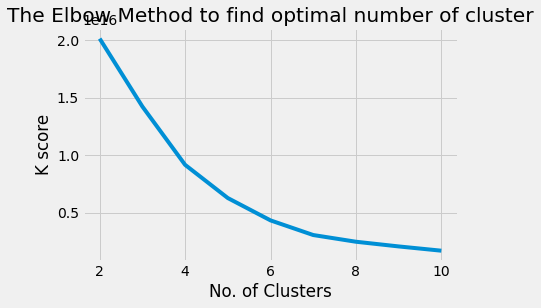

In [ ]:
import matplotlib.pyplot as plt
score = []
for i in range(2, 11):
  km =KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  km.fit(X)
  score.append(km.inertia_)
plt.style.use("fivethirtyeight") 
plt.plot(range(2, 11), score)
plt.title('The Elbow Method to find optimal number of cluster')
plt.xlabel('No. of Clusters')
plt.ylabel('K score')
plt.show()

In [ ]:
other_paremeter = {
"init": "random",
 "n_init": 1,
 "max_iter": 1,
"random_state": 0,
 }

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_coefficients = []

for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, **other_paremeter)
  kmeans.fit(X)
  score = Silhouette_score(X, kmeans.labels_)
  silhouette_coefficients.append(score)

In [34]:
scaler = Pipeline([("scaler", MinMaxScaler()),("pca", PCA(n_components=2, random_state=42)),])

In [35]:
cluster = Pipeline([("kmeans",
KMeans(
n_clusters=4, # we get from elbow methods 
init="k-means++",
n_init=50,
max_iter=500,
random_state=42,),),])

In [36]:
pipe = Pipeline([("preprocessor", scaler),("clusterer", cluster)]) # all together 
pipe.fit(X)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', MinMaxScaler()), ('pca', PCA())])),
                ('clusterer', Pipeline(steps=[('kmeans', KMeans())]))])

In [37]:
preprocessed_data = pipe["preprocessor"].transform(X)
predicted_labels = pipe["clusterer"]["kmeans"].labels_


In [ ]:
from cuml.metrics.cluster import silhouette_score as Silhouette_score
Silhouette_score(preprocessed_data, predicted_labels)

In [38]:
dataframe_pca = pd.DataFrame(
pipe["preprocessor"].transform(X),
columns=["component_1", "component_2"],)

dataframe_pca["predicted_cluster"] = pipe["clusterer"]["kmeans"].labels_

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



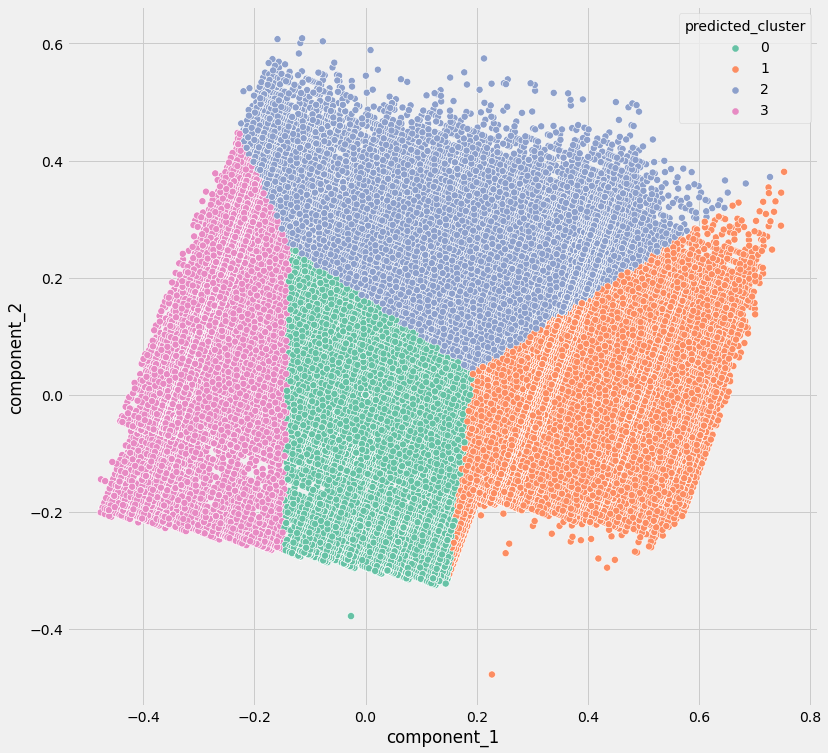

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")
plt.figure(figsize=(12, 12))
scat = sns.scatterplot(
"component_1",
"component_2",
s=50,
data=dataframe_pca,
hue="predicted_cluster",
palette="Set2"
)

In [40]:
dataframe_pca

,component_1,component_2,predicted_cluster
0,-0.370324,0.068732,3
1,-0.299170,-0.072386,3
2,-0.299162,-0.072384,3
3,-0.302374,-0.080547,3
4,-0.299163,-0.072384,3
...,...,...,...
996884,-0.335497,-0.020385,3
996885,-0.242355,0.216336,3
996886,-0.296954,0.077569,3
996887,-0.306591,0.053080,3


# Hierichy clustering

In [ ]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.axhline(y=150, color='r', linestyle='--')
plt.title('Dendrogam')
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

In [41]:
x = dataframe_pca[["component_1", "component_2"]]

In [47]:
aggcluster = AgglomerativeClustering(n_clusters = 4,affinity = 'euclidean')
aggcluster = cluster.fit(x)

In [52]:
x["aggcluster_label"] =aggcluster.labels_
x.head()

,component_1,component_2,cluster_label,aggcluster_label
0,-0.370324,0.068732,1,1
1,-0.299170,-0.072386,1,1
2,-0.299162,-0.072384,1,1
3,-0.302374,-0.080547,1,1
4,-0.299163,-0.072384,1,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



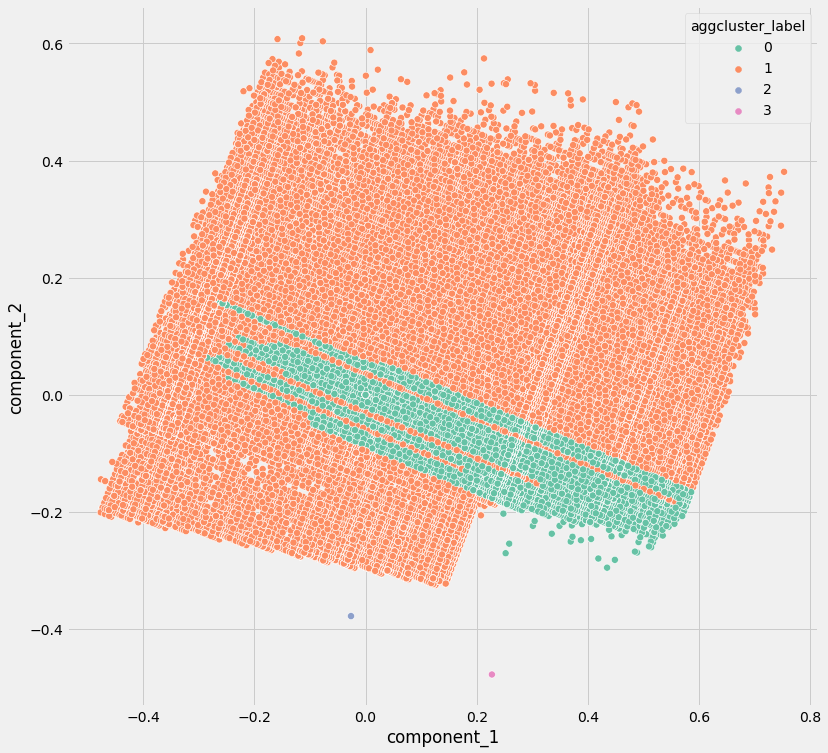

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")
plt.figure(figsize=(12, 12))
scat = sns.scatterplot(
"component_1",
"component_2",
s=50,
data=x,
hue="aggcluster_label",
palette="Set2"
)